In [2]:
# ! pip install -U git+https://github.com/huggingface/transformers.git
# ! pip install -U git+https://github.com/huggingface/accelerate.git

In [4]:
import pandas as pd
train_data=pd.read_csv("/content/sst2_train.csv")
test_data=pd.read_csv("/content/sst2_validation.csv")
train_data.head()

,sentence,label,idx
0,hide new secretions from the parental units,0,0
1,"contains no wit , only labored gags",0,1
2,that loves its characters and communicates som...,1,2
3,remains utterly satisfied to remain the same t...,0,3
4,on the worst revenge-of-the-nerds clichés the ...,0,4


In [5]:
#removing the index coloumn as it is not need for training the model
train_data=train_data[["sentence","label"]]

test_data=test_data[["sentence","label"]]
test_data.head()

,sentence,label
0,it 's a charming and often affecting journey .,1
1,unflinchingly bleak and desperate,0
2,allows us to hope that nolan is poised to emba...,1
3,"the acting , costumes , music , cinematography...",1
4,"it 's slow -- very , very slow .",0


**DATA VISUALIZATION**

In [6]:
import pandas as pd
import matplotlib.pyplot as plt


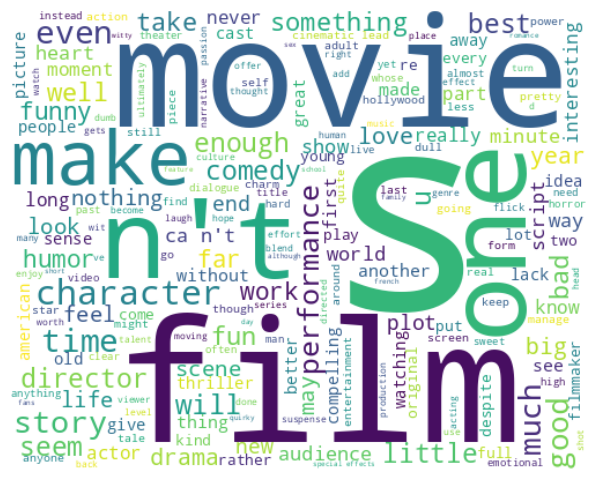

In [7]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Load the SST-2 dataset
df = pd.read_csv('/content/sst2_validation.csv')

# =cancating all the sentence in the dataset
all_text = ' '.join(df['sentence'])

# create the image
wordcloud = WordCloud(width=500, height=400, background_color='white').generate(all_text)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA

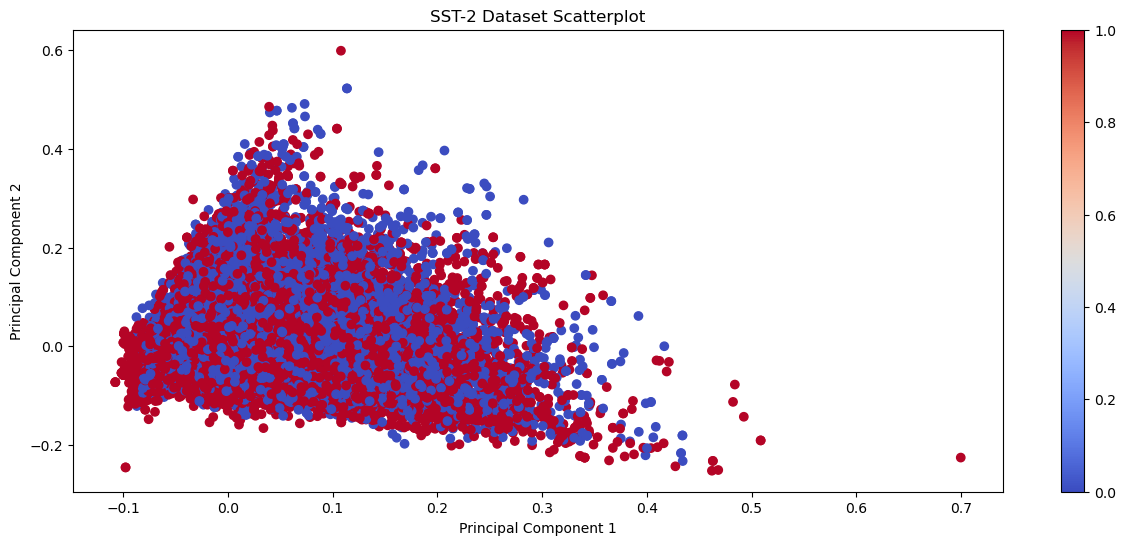

In [ ]:
# Load the SST-2 dataset
df = pd.read_csv('/kaggle/input/glue-dataset/sst2_train.csv')

# Vectorize the sentences using TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['sentence'])

# Perform PCA to reduce the dimensions to 2
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

# Create a scatterplot
plt.figure(figsize=(15, 6))
plt.scatter(X_pca[:, 0], X_pca[:,1], c=df['label'], cmap='coolwarm')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('SST-2 Dataset Scatterplot')
plt.colorbar()
plt.show()

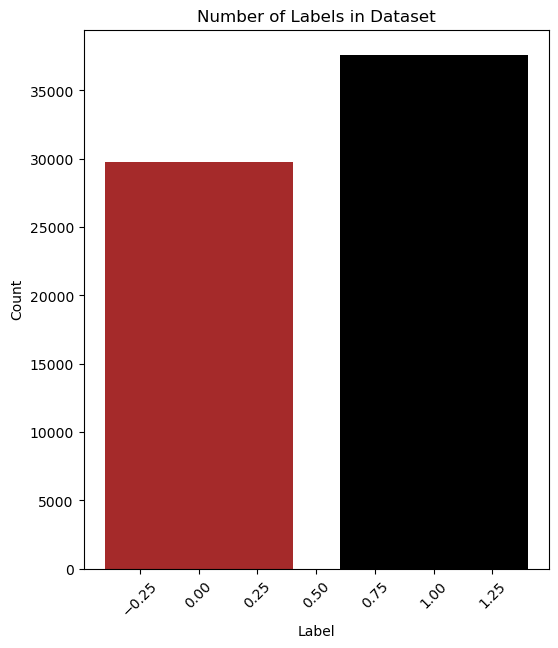

In [ ]:
#showing the no of labels in the dataset

# Load the dataset
df = pd.read_csv("/kaggle/input/glue-dataset/sst2_train.csv")

# Count the number of unique labels
label_counts = df["label"].value_counts()

# Plot the graph
plt.figure(figsize=(6,7))
plt.bar(label_counts.index, label_counts.values,color=["black","brown"])
plt.xlabel("Label")
plt.ylabel("Count")
plt.title("Number of Labels in Dataset")
plt.xticks(rotation=45)
plt.show()

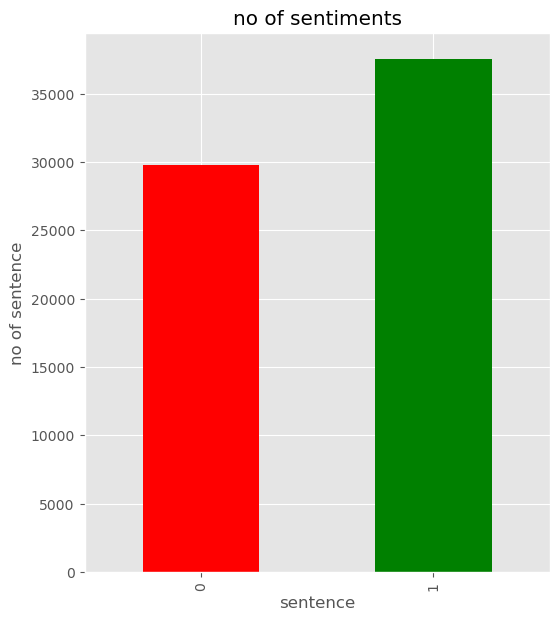

In [ ]:
plt.style.use('ggplot')
df = pd.read_csv("/kaggle/input/glue-dataset/sst2_train.csv")
label_counts = df["label"].value_counts()
ax=df["label"].value_counts().sort_index().plot(kind="bar",
                        title="no of sentiments",figsize=(6,7),
                        color=["red","green"])
ax.set_xlabel("sentence")
ax.set_ylabel("no of sentence")
plt.show()

**training of the model**

In [3]:
#importing the required library for training the model
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
import torch
from transformers import TrainingArguments, Trainer
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification

In [8]:
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased',num_labels=2)

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForSequenceClassification: ['vocab_transform.bias', 'vocab_layer_norm.weight', 'vocab_transform.weight', 'vocab_projector.bias', 'vocab_layer_norm.bias']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight', 'classifier.

In [9]:
X_train = list(train_data["sentence"])
y_train = list(train_data["label"])

X_val =list(test_data["sentence"])
y_val =list(test_data["label"])
X_train_tokenized = tokenizer(X_train, padding=True, truncation=True, max_length=512)
X_val_tokenized = tokenizer(X_val, padding=True, truncation=True, max_length=512)
print("done tokenizing the data")

done tokenizing the data


In [ ]:
X_train_tokenized.keys()


dict_keys(['input_ids', 'attention_mask'])

In [12]:
# Create torch dataset
class Dataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels=None):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        if self.labels:
            item["labels"] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.encodings["input_ids"])

In [13]:
train_dataset = Dataset(X_train_tokenized, y_train)
val_dataset = Dataset(X_val_tokenized, y_val)
print("done")

done


In [ ]:
train_dataset[3]

{'input_ids': tensor([  101,  3464, 12580,  8510,  2000,  3961,  1996,  2168,  2802,   102,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0]),
 'attention_mask': tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 'labels': tensor(0)}

In [14]:
def compute_metrics(p):
    print(type(p))
    pred, labels = p
    pred = np.argmax(pred, axis=1)

    accuracy = accuracy_score(y_true=labels, y_pred=pred)
    recall = recall_score(y_true=labels, y_pred=pred)
    precision = precision_score(y_true=labels, y_pred=pred)
    f1 = f1_score(y_true=labels, y_pred=pred)
    cm = confusion_matrix(y_true=labels, y_pred=pred)

    return {"accuracy": accuracy, "precision": precision, "recall": recall, "f1": f1,"pred":pred,"conf":cm}

In [15]:
args = TrainingArguments(
    output_dir="output",
    num_train_epochs=1,
    per_device_train_batch_size=8

)
trainer = Trainer(
    model=model,
    args=args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics
)

In [16]:
trainer.train()

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Step,Training Loss
500,0.428600
1000,0.350900
1500,0.347000
2000,0.306000
2500,0.299500
3000,0.294300
3500,0.269700
4000,0.256600
4500,0.232000
5000,0.247100


TrainOutput(global_step=8419, training_loss=0.27078633750755127, metrics={'train_runtime': 585.881, 'train_samples_per_second': 114.953, 'train_steps_per_second': 14.37, 'total_flos': 1150043146323192.0, 'train_loss': 0.27078633750755127, 'epoch': 1.0})

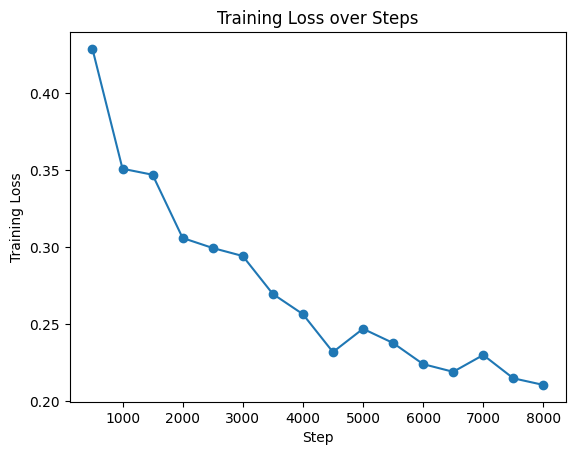

In [26]:
import matplotlib.pyplot as plt

steps = [500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 5500, 6000, 6500, 7000, 7500, 8000]
loss = [0.4286, 0.3509, 0.347, 0.306, 0.2995, 0.2943, 0.2697, 0.2566, 0.232, 0.2471, 0.2379, 0.2242, 0.2192, 0.2301, 0.215, 0.2107]
plt.plot(steps, loss, marker='o')
plt.xlabel('Step')
plt.ylabel('Training Loss')
plt.title('Training Loss over Steps')
plt.show()

In [18]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns

In [19]:
evaluation = trainer.predict(val_dataset)

<class 'transformers.trainer_utils.EvalPrediction'>


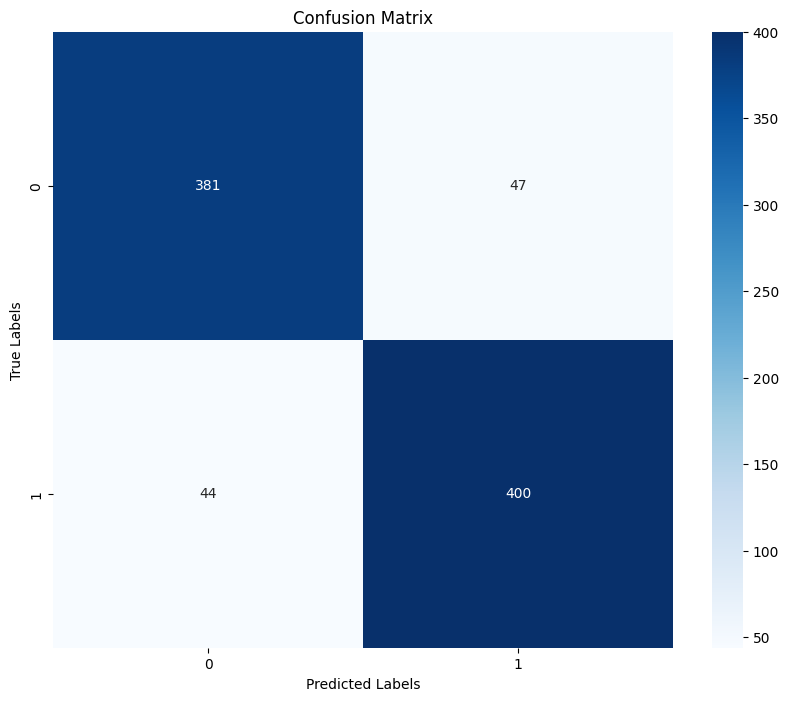

In [20]:
# Access the confusion matrix from the evaluation results
confusion_matrix = evaluation.metrics["test_conf"]

# Plot the confusion matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [22]:
trainer.save_model("CustomModel")

In [23]:
model_2 =DistilBertForSequenceClassification.from_pretrained("CustomModel")
model_2.to('cuda')


DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): MultiHeadSelfAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)
 

In [24]:
text = "the food was not good but the pizaa was nice"
inputs = tokenizer(text,padding = True, truncation = True, return_tensors='pt').to('cuda')
outputs = model_2(**inputs)
predictions = torch.nn.functional.softmax(outputs.logits, dim=-1)
predictions = predictions.cpu().detach().numpy()
predictions

array([[0.00140958, 0.9985904 ]], dtype=float32)